In [1]:
# import all the required packages and modules
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
from matplotlib import pyplot as plt
import numpy as np
import pickle
import sys
sys.path.append('/Users/bpb/Data/programming/MetaboliteAtlas/github/metatlas/')
import metatlas




In [2]:
metatlas_data = pickle.load( open( "caj_data_practice_metatas_isotopes.pkl", "rb" ) )
for key in metatlas_data:
   globals()[key]=metatlas_data[key]

In [3]:
dataMat = np.zeros((len(data),7,len(export_fileIds)))
for i,datum in enumerate(data):
    rtMin = float(dictData[u'compounds'][i][u'rt_min'])
    rtMax = float(dictData[u'compounds'][i][u'rt_max'])
    for j,myFile in enumerate(export_fileIds):
        for k in range(7):
            if datum[k].size>3:
                idx = np.logical_and( datum[k][:,2]==myFile, datum[k][:,0]>=rtMin, datum[k][:,0]<=rtMax )
                if np.sum(idx)>0:
                    x1 = datum[k][:,0][idx]
                    y1 = datum[k][:,1][idx]
                    y1 = y1 - np.min(y1)
    #                 y1 = y1[:] / fileInfo['normalization_factor'][j]
                    dataMat[i,k,j] = np.sum(y1)

In [4]:
print dataMat

[[[  3926.3012   3308.3105]
  [  3162.4102   4433.2916]
  [   917.611    2675.0385]
  [   383.414    2135.7519]
  [   102.        734.2916]
  [   257.2232    436.2893]
  [   241.3456    401.1177]]

 [[ 16130.0844   1246.9726]
  [  4782.2818   2598.324 ]
  [   384.7277   1686.5495]
  [   120.2472    471.803 ]
  [   603.0203   2259.2653]
  [   257.1841    845.508 ]
  [   304.7077   1177.6642]]

 [[ 25059.1056  17853.9505]
  [  1682.7681  14997.3159]
  [  1847.1844   3226.0649]
  [  2141.3022   1700.5016]
  [  1584.2893   1205.4815]
  [   246.7088   2670.6752]
  [   411.9333   1676.7263]]

 [[  2131.3319   1948.6504]
  [  1562.4714   1795.4098]
  [   881.5943    585.3267]
  [   342.5347   1032.1698]
  [   176.8901   1170.7782]
  [   841.5838   2608.9416]
  [   774.0008    900.9126]]

 [[  2206.7001   2394.1464]
  [  1908.3299   1476.1373]
  [  1019.678    3327.4613]
  [  2354.4116   1427.2227]
  [  1102.1931   1988.3984]
  [   137.555    2419.2972]
  [   246.0291   1611.3543]]]


In [7]:
metatlas = reload(metatlas)
myFormula = dictData['compounds'][0]['formula']
f = metatlas.chemformula_struct(myFormula)
print f
m = metatlas.monoisotopicmass(myFormula)
print m
fList = metatlas.chemformula_list(myFormula)
print fList
mass,magnitude,monoisotopic = metatlas.isotope(fList,0)
print mass
print magnitude
print monoisotopic

[(u'C', u'35'), (u'H', u'70'), (u'N', u''), (u'O', u'8'), (u'P', u'')]
618.507069224
[ 70.  35.   0.   8.   0.   0.   0.   0.]
[ 618.50746   619.510815  620.51417   621.517525  622.52088   623.524235]
[  6.56439605e-01   2.67238160e-01   6.34737464e-02   1.10839116e-02
   1.55839619e-03   1.85136431e-04]
618.50746


In [10]:
# myFormulae = ['C33H63O4','C34H63O4','C34H65O4','C37H67O4','C37H69O4']
myFormulae = []
for c in dictData['compounds']:
    myFormulae.append(c['formula'])
fList = []
nList = []
mList = []
for formula in myFormulae:
    temp = metatlas.chemformula_list(formula)
    mList.append(metatlas.monoisotopicmass(formula))

    fList.append(list(temp))
    nList.append(20)
print list(fList)
print nList
print mList

[[70.0, 35.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0], [70.0, 37.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0], [72.0, 37.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0], [74.0, 37.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0], [74.0, 39.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0]]
[20, 20, 20, 20, 20]
[618.50706922380004, 642.50706922379993, 644.52271928799996, 646.53836935219999, 670.53836935219999]


(10, 28)
[ 618.595  619.6    620.605  621.61   622.61   623.615  624.62   625.62
  642.595  643.6    644.605  645.61   646.61   647.615  648.62   649.62
  650.635  651.635  652.65   653.65   670.63   671.63   672.635  673.64
  674.64   675.645  676.65   677.65 ]


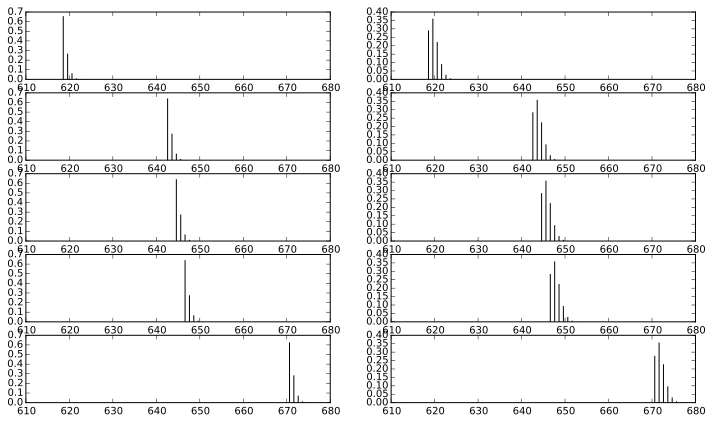

In [11]:
mzvec,isoY = metatlas.isotopic_pattern(fList, 0.04, nList)
print isoY.shape
mzvec = mzvec + 0.09
print mzvec


plt.figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
for i in range(isoY.shape[0]):
    plt.subplot(5,2,i+1).vlines(mzvec,0,isoY[i,:])
#     plt.subplot(1,2,2).vlines(mzvec,0,isoY[1])
plt.show()